# p. 42-43

> Wrong definition of "Multivariate linear regression"

It seems that the definitions for “multiple / multivariable regression” and “multivariate regression” available online are highly mixed and often used interchangeably. Nevertheless, after some searching online, it seems that more respectable sources of the definitions of these terms agree on the following: 
-	**Multivariate regression**: predict multiple ($\ge 1$) dependable variables $y$ (labels);
-	**Multivariable / multiple regression**: uses multiple ($\ge 1$) input variables (independent variables / features) to predict one label $y$, e.g. $y = x1 + x2 + x3 + b$

Sources:
- "multivariate regression is a technique that estimates a single regression model with more than one outcome variable. When there is more than one predictor variable in a multivariate regression model, the model is a multivariate multiple regression." (https://stats.oarc.ucla.edu/stata/dae/multivariate-regression-analysis/)
- "Multivariable linear regression … with more variables … linear regression with two input variables and one output variable" (p . 191, “Essential Math for Data Science”, Thomas Nield (O’REILLY)) 
- "Statistically speaking, multivariate analysis refers to statistical models that have 2 or more dependent or outcome variables,1 and multivariable analysis refers to statistical models in which there are multiple independent or response variables." (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3518362/)
- "Multivariate Multiple Regression is a method of modeling multiple responses, or dependent variables, with a single set of predictor variables." (https://library.virginia.edu/data/articles/getting-started-with-multivariate-multiple-regression)



# Chapter 3

## p. 56 (erroneous epoch definition)

At the bottom of the page there is a definition of an *epoch*. In the ML and SGD literature online, there is a different definition for this term:
- **1 epoch**: going through the entire dataset once. In classical SGD with replacement, we cannot use the entire dataset due to replacement, so we better use term "iteration"


## p. 66 (Loss calculation mistake)

Check on Github - mistake in calculating RMSE - used prediction for the first data point vs entire label set, rather than all predictions vs all labels.

| | |
| - | - |
| Version 'a':<br>Book version (erroneous)<br> `predictions = features[0] * _m + _b` | 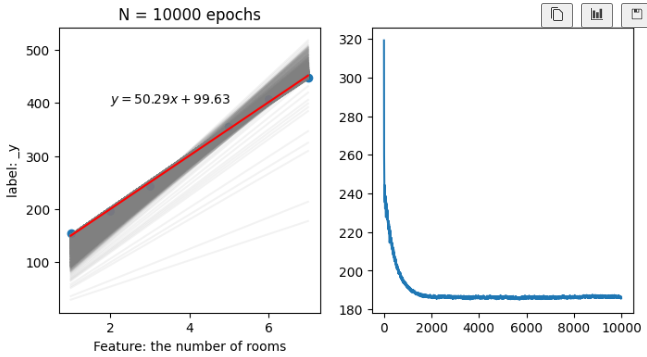 | |
| Version 'b':<br>My version (corrected)<br> `predictions = [ i*_m1 + j*_m2 + _b for i,j in features ]` | 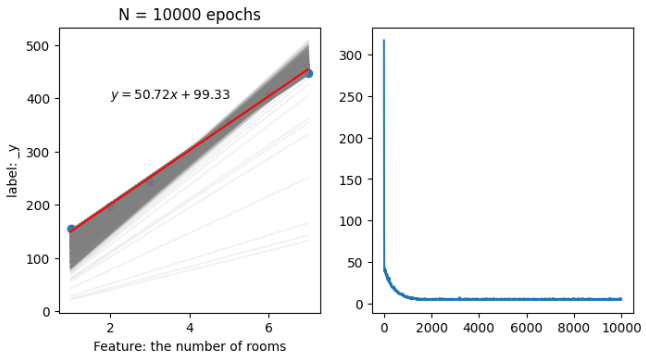 |

Code:

```py
def linear_regression(features_data, labels, learning_rate=0.01, epochs=1000):
	""" 
	learning_rate = a very small number by which changes to the model are made. 
	epochs = how many iterations of learning we need to perform. 
	"""
	# Generate random values for the slope and y-intercept
	m = random.random() 
	b = random.random()
	# Repeats the update step many times
	slope_intercept_list, errors = [], []
	for epoch in range(epochs):
		### Here there was a mistake:
		### The book (version 'a') just used prediction for the first data point in the 'features' array,
		### therefore, rmse was calculated as rmse for each point in the labels minus the same prediction for the first data point.
		### this is incorrect, as we should compare predictions for all data points in features vs all labels
		### so version 'b' is correct
		# predictions = features_data[0] * _m + _b # Version 'a' (manning book)
		predictions = [ i*m + b for i in features_data ] # version 'b' (my version)
		# print(predictions)
		errors.append(rmse(labels, predictions))
		### Pick a random point in out dataset
		i = random.randint(0, len(features_data)-1) 
		x = features_data[i]
		y = labels[i]
		# Apply the square trick to move the line closer to our point
		m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
		slope_intercept_list.append([m, b])
	return slope_intercept_list, errors
```


## Implementing SGD for simple linear regression (p.55)

> This example was slightly modified from the excellent book "Grokking Machine Learning" by the brilliant Luis Serrano.

Below is a book's intuition for Stochastic Gradient Descent for simple linear regression, given as "square trick" and "absolute trick". 

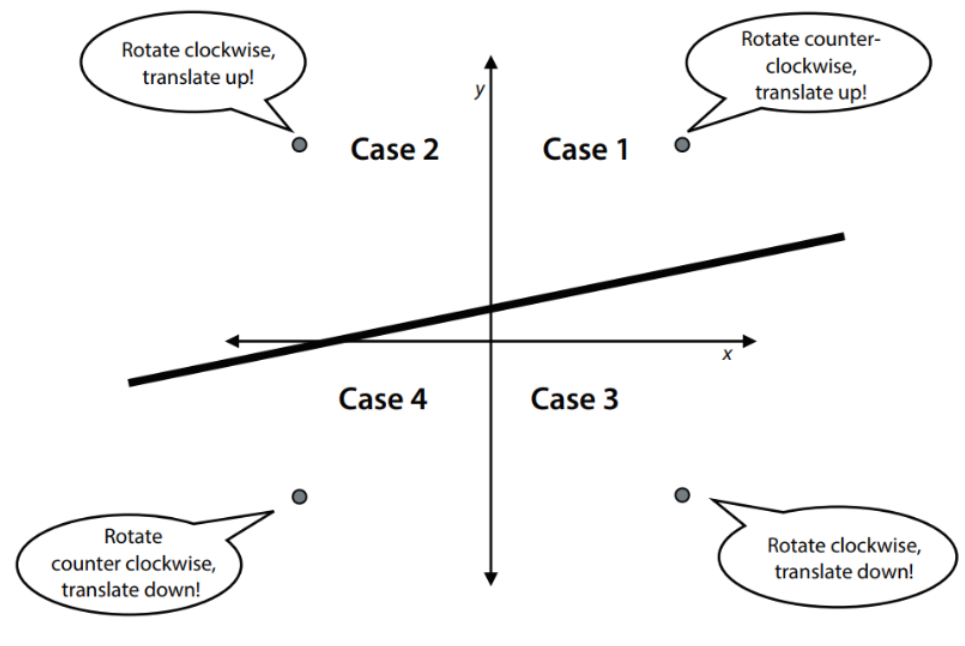

In the "square trick", we want to move the line up if the real point is above the prediction line and move it downward when the point is below the prediction line. 

- **Adjusting the y-intercept $b$**:
  - We want to add some number to the y-intercept $b$ when point is above the prediction line, and subtract if point is below; 
  - therefore, we can just add $ \eta (p-\hat{p})$ to y-intercept. 
- **Adjusting the slope $m$**:
  - We can adjust the slope by adding to slope the product of $x$ and $(y - \hat{y})$
  - A detailed explanation below:
  - We need to reduce $m$ in cases 2 and 3:
    - Case 2: $x < 0, (y - \hat{y}) > 0, x * (y - \hat{y}) < 0$
    - Case 3: $x > 0, (y - \hat{y}) < 0, x * (y - \hat{y}) < 0$
  - We need to increase $m$ in cases 1 and 4:
    - Case 1: $x > 0, (y-\hat{y}) > 0, x * (y-\hat{y}) > 0$ 
    - Case 4: $x < 0, (y-\hat{y}) < 0, x * (y-\hat{y}) > 0$

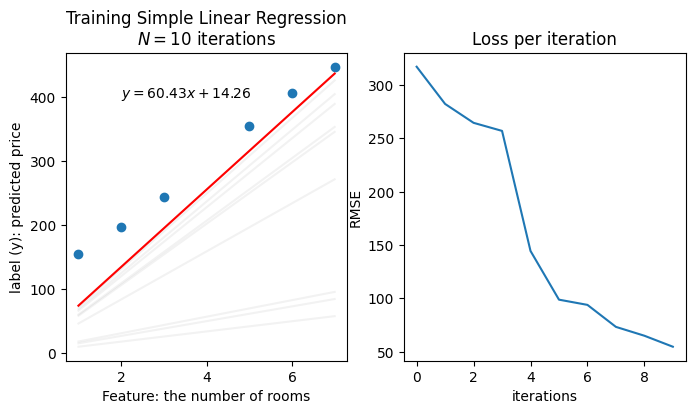

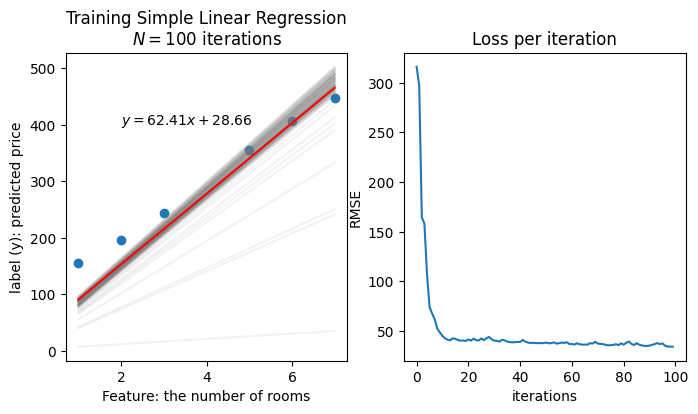

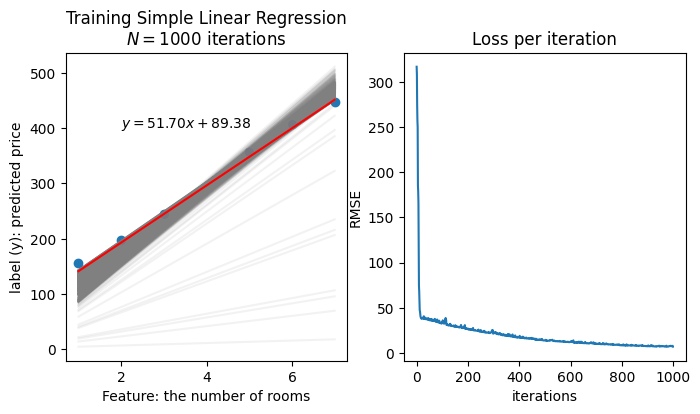

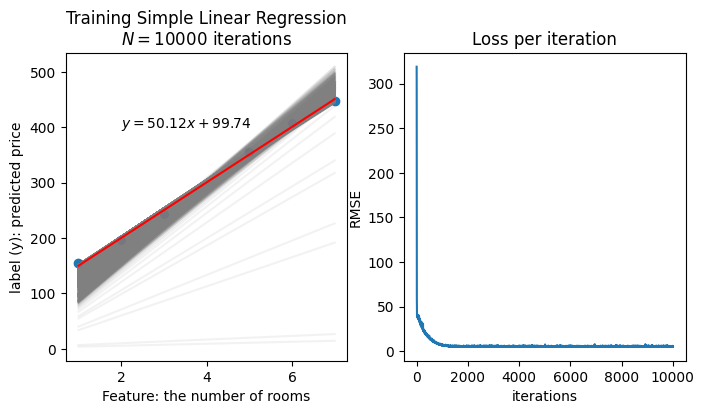

In [1]:
"""
Simple Linear Regression 
parameter training with Stochastic Gradient Descent
"""
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def rmse(labels, 
         predictions
         ):
	"""
	return Root Mean Square Error of predictions
    """
	### y - y_hat
	differences = np.subtract(labels, predictions)
	n = len(labels)
	### here we use np.dot dot product of differences, which is essentially the sum of squares of each difference; a sum of products of corresponding terms in two vectors
	return np.sqrt(1/n * (np.dot(differences, differences)))

def square_trick(b, 
                 m, 
                 x, 
                 y, 
                 learning_rate
                 ):
	"""
	"Grokking Machine Learning", p. 55
	This function updates parameters b and m based on one data point _x and label _y.
	It basically represents a derivative of the cost function e(x) of square difference:
	e(x) = sum( y_hat - y )^2 = sum( mx+b - y )^2
	with respect to m and b separately
	"""
	### Calculate prediction
	y_pred = b + m*x
	### Change y-intercept $b$
	b += learning_rate * (y - y_pred)
	### Change slope $m$
	m += learning_rate * x * (y - y_pred)
	return m, b

def absolute_trick(b, 
                   m, 
                   x, 
                   y, 
                   learning_rate
                   ):
	"""
	you can also use this way of updating parameters m and b

	simpler than the square trick because it only uses _x to adjust the parameters
	
	is based on another loss metric
	"""
	y_pred = b + m*x 
	### if the point is above the line
	if y > y_pred:
		### increase slope m
		m += learning_rate * x 
		### translate the intercept up
		b += learning_rate
	else:
		m -= learning_rate * x 
		b -= learning_rate 
	return m, b 

def linear_regression(features_data, 
                      labels, 
                      learning_rate=0.01, 
                      iterations=1000
                      ):
	""" 
	algorithm for linear regression learning
	"""
	# Generate random values for the slope and y-intercept
	m = random.random() 
	b = random.random()
	# Repeats the update step many times
	slope_intercept_list, errors = [], []
	for iteration in range(iterations):
		### Here there was a mistake in the book's code in calculating predictions for error estimation: see subsection "p. 66 (Loss calculation mistake)"
		predictions = [ i*m + b for i in features_data ]
		errors.append(rmse(labels, predictions))
		### Pick a random point in out dataset
		i = random.randint(0, len(features_data)-1) 
		x = features_data[i]
		y = labels[i]
		# Apply the square trick to move the line closer to our point
		m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
		slope_intercept_list.append([m, b])
	return slope_intercept_list, errors

features_data = np.array([1,2,3,5,6,7])
labels = np.array([155,197,244,356,407,448])

### For different number of iterations
for i in [10, 100, 1000, 10000]: 
	fig, axes = plt.subplots(1, 2, figsize=(8,4))
	### [0] Left plot
	### plot data points
	axes[0].scatter(features_data, labels)
	axes[0].set_xlabel('Feature: the number of rooms')
	axes[0].set_ylabel('label (y): predicted price')
	axes[0].set_title(f"Training Simple Linear Regression\n$N = {i}$ iterations") 
	### Plot lines of intermediate trained linreg models
	slope_intercept_list_ready, errors = linear_regression(features_data, 
                                                           labels, 
                                                           learning_rate=0.01, 
                                                           iterations=i)
	for i in slope_intercept_list_ready:
		current_slope, current_intercept = i[0], i[1]
		axes[0].plot( features_data, features_data*current_slope + current_intercept, color='grey', alpha=0.1 )
	### Plot final trained linreg line (red)
	final_slope, final_intercept = slope_intercept_list_ready[-1][0], slope_intercept_list_ready[-1][1]
	axes[0].plot( features_data, features_data*final_slope + final_intercept, color='red' )
	axes[0].text(2, 400, rf'$y={final_slope:.2f}x + {final_intercept:.2f}$')
	### [1] Right plot
	axes[1].plot( range(len(errors)), errors )
	axes[1].set_xlabel('iterations')
	axes[1].set_ylabel('RMSE')
	axes[1].set_title( 'Loss per iteration')


## Implementing SGD for multiple linear regression

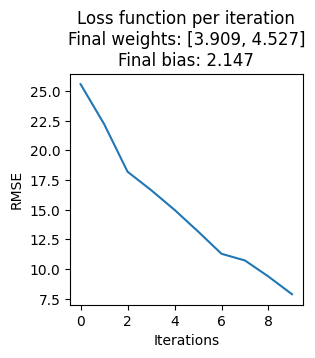

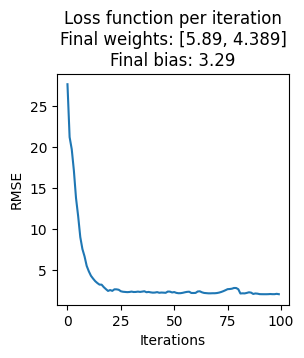

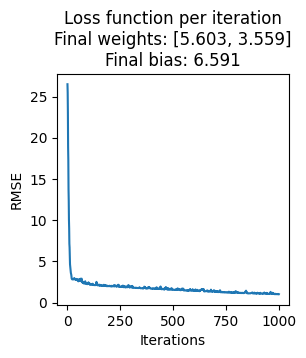

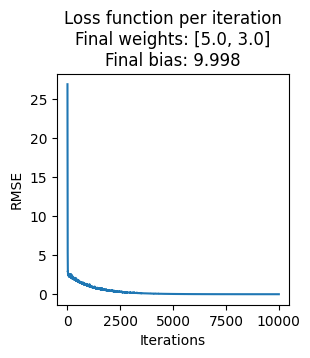

In [20]:
import random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

def rmse(labels, 
         predictions
         ):
    n = len(labels)
    ### y - y_hat
    differences = np.subtract(np.array(labels), predictions)
    ### here we use np.dot dot product of differences, which is essentially sum of squares of each difference
    return np.sqrt(1/n * (np.dot(differences, differences)))

def square_trick(b, 
                 m, 
                 x, 
                 y, 
                 learning_rate
                 ):
    ### Calculate prediction
    y_pred = np.dot(m, x) + b
    ### Change y-intercept $b$
    b += learning_rate * (y - y_pred)
    ### Change slope $m$
    #### You can adjust m parameters one by one
    # m1 += learning_rate * x1 * (y - y_pred)
    # m2 += learning_rate * x2 * (y - y_pred)
    #### A better alternative is to adjust all the parameters at the same time using the vector structure
    delta = x * (y - y_pred) * learning_rate
    m = m + delta
    return m, b

def linear_regression(features, 
                      labels, 
                      learning_rate=0.01, 
                      iterations=1000
                      ):
    # Generate random values for the slope and y-intercept
    # m1, m2 = random.random(), random.random() 
    m = np.array([random.random() for i in range(len(features[0]))])
    b = random.random()
    # Repeats the update step many times
    slope_intercept_list, errors = [], []
    for epoch in range(iterations):
        predictions = np.dot(features, m) + b
        errors.append(rmse(labels, predictions))
        ### Pick a random point in out dataset
        i = random.randint(0, len(features)-1) 
        x = features[i]
        y = labels[i]
        # Apply the square trick to move the line closer to our point
        m, b = square_trick(b, m, x, y, learning_rate=learning_rate)
        slope_intercept_list.append([m, b])
    return slope_intercept_list, errors

"""
equation: 
y = 5x_1 + 3x_2 + 10
"""
features = np.array([[i,j] for i in range(1,5) for j in range(1,5)])
labels = np.array([5*i + 3*j + 10 for i,j in features])

def plot_visualisations(features, labels):
    # Plot the visualisations
    figure_size, epoch_alpha = (4,4), 0.1
    # for i in [10, 100, 1000]: # Different number of iterations
    for i in [10, 100, 1000, 10000]:
        slope_intercept_list_ready, errors = linear_regression(features, labels, learning_rate=0.01, iterations=i)
        ### Plot final line
        plt.figure(figsize=(3,3))
        plt.plot( range(len(errors)), errors )
        plt.ylabel('RMSE')
        plt.xlabel('Iterations')
        plt.title(f'Loss function per iteration\nFinal weights: {[round(i, 3) for i in slope_intercept_list_ready[-1][0]]}\nFinal bias: {round(slope_intercept_list_ready[-1][1], 3)}')
        plt.show()

plot_visualisations(features, labels)

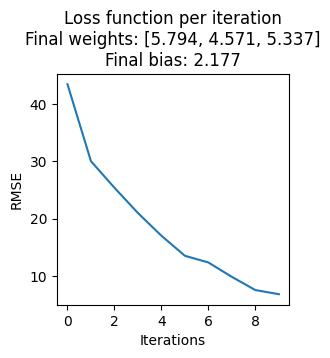

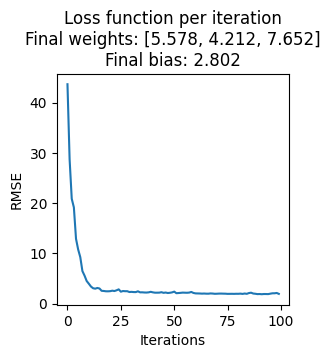

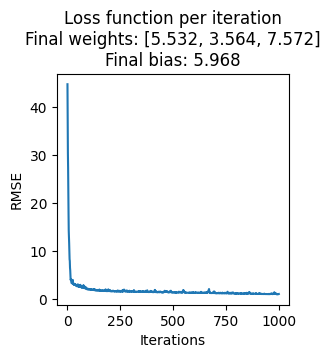

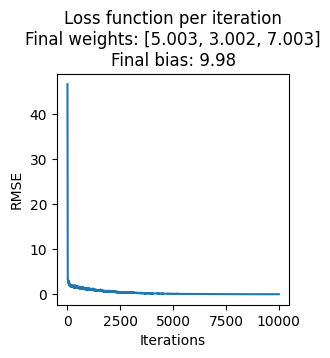

In [22]:
"""
equation: 
y = 5x_1 + 3x_2 + 7x_3 + 10
"""
features = np.array( [[i,j,k] for i in range(1,5) for j in range(1,5) for k in range(1,5)] )
labels = np.array( [5*i + 3*j + 7*k + 10 for i,j,k in features] )

plot_visualisations(features, labels)


# Chapter 5

## p. 113

Lower half of the page:

> "The equation of the score of the classifier, and also of the line in figure 5.5, follows: #crack + #doink - 3.5 = 0"

The presented equation is, as the text states, equation of the classifier threshold / class separation line; however, it is NOT the equation for the score! The equation for the score of the classifier has to have $\hat{y}$ and corresponds to the following equation
$$\hat{y} = \text{\#crack} + \text{\#doink} - 3.5$$

## p. 119

Lower part of the page:

> "Words with positive weights are happy, and words with <u>negative words</u> are sad."

Instead of the underlined "negative words", it should have said "negative weights". 

## p. 120
Upper part of the page, figure 5.11. The line on the left has a <u>positive</u> bias, while the one on the right has a <u>negative</u> bias. 

The confusion stems from the following misambiguation. 

Consider the following plots: 

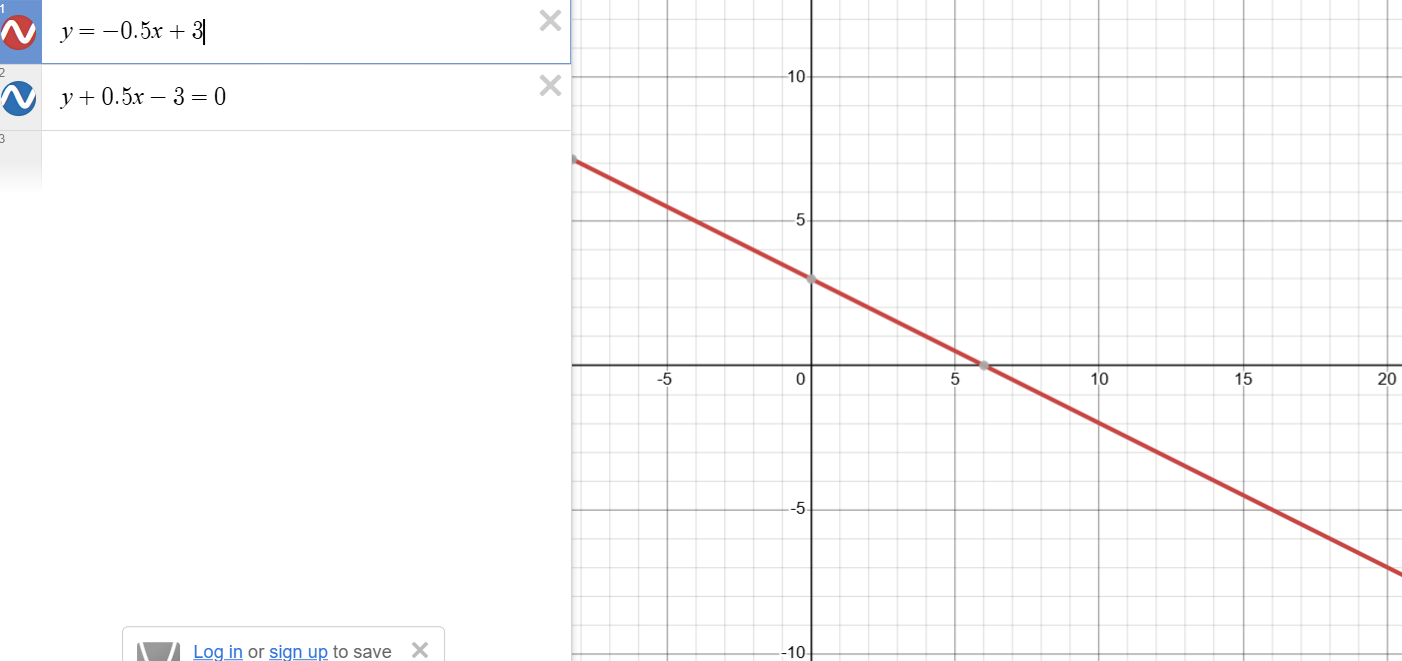

If you consider equation in this form $y+0.5x-3=0$, then the bias is negative. However, this equation coresponds simply to the line dividing the two classes, not making a prediction. However, if you consider the same equation but rewritten to make a prediction - $y=-0.5x+3$, then the bias is actually positive. 

## p. 133

in the Procedure, in Case 3, it says "$b` = b - \mu x_{2}$". However, the bias should increase, so the correct equation should say "$b` = b + \mu x_{2}$"

p. 139

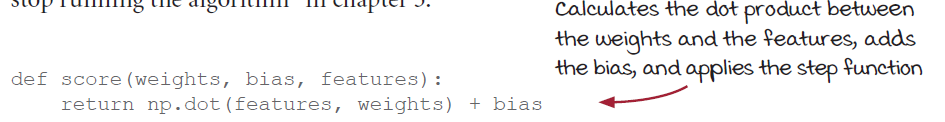

The score doesn't apply the step function at this step; it applies step function to the result of the "score" function. 

## Coding the perceptron

##### 1 (by hand)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

df.head()

,feature 1,feature 2,label
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1


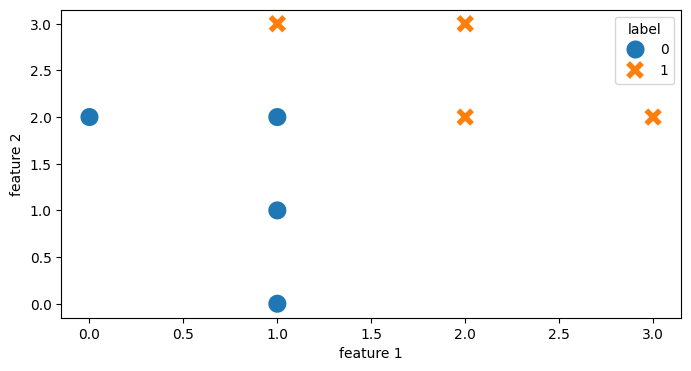

In [ ]:
plt.figure(figsize=(8,4));
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=200, 
	hue=df['label']
	# markers={'feature 1':'s', 'feature 2': 'X'}
);

In [ ]:
# Coding the perceptron trick

def score(weights, bias, features):
    """
    this is a continuous prediction before applying the step function
    """
    return np.dot(features, weights) + bias 

def step(x):
    """
    applies the step function to the score x
    """
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    """
    calculates error for prediction for one data point
    """
    pred = prediction(weights, bias, features)
    ### If the prediction is equal to the label,
    ### then the point is well classified,
    ### which means the error is zero
    if pred == label:
        return 0
    ### If the prediction is different from the label, then the point is misclassified,
    ### which means that the error is equal to the absolute value of the score
    else:
        return np.abs( score(weights, bias, features) )

def mean_perceptron_error(weights, bias, features, labels):
    """
    calculates the mean of errors of all data points in the dataset
    """
    total_error = 0
    ### Loops through our data, and for each point, adds the error at that point, then returns this error
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    ### Get mean error
    return total_error / len(features)

def perceptron_trick(weights, bias, features, label, learning_rate=0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        ### updates the weights and biases using the perceptron trick
        weights[i] += (label-pred) * features[i] * learning_rate
    bias += (label-pred) * learning_rate
    return weights, bias

def perceptron_algorithm(features, 
                         labels, 
                         learning_rate=0.01, 
                         epochs=200,
                         visualise=True
                         ):
    """
    Starts with randomly-initialised perceptron classifier 
    and repeats the perceptron trick for many iterations
    """
    ### Initialises the weights to 1 and the bias to 0 (essentially, random numbers)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    cumulative_weights_bias = []
    ### Repeat for N number of epochs
    for epoch in range(epochs):
        ### Calculate mean perceptron error
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        ### Pick a random point in the dataset
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
        cumulative_weights_bias.append([ weights, bias ])
        # Draw a graph
        datapoints = np.arange(0, 4, 1)
        a = weights[0]
        b = weights[1]
        c = bias
        if visualise:
            sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , alpha=0.05, color='grey'  )
    return weights, bias, cumulative_weights_bias, errors



0.4199999999999995
0.10999999999999936
-0.6900000000000004


Text(0.5, 1.0, 'Classifier\nRed line (decision border) equation: 0=0.42x1 + 0.11x2 + -0.69\nPrediction: y = 0.42x1 + 0.11x2 + -0.69')

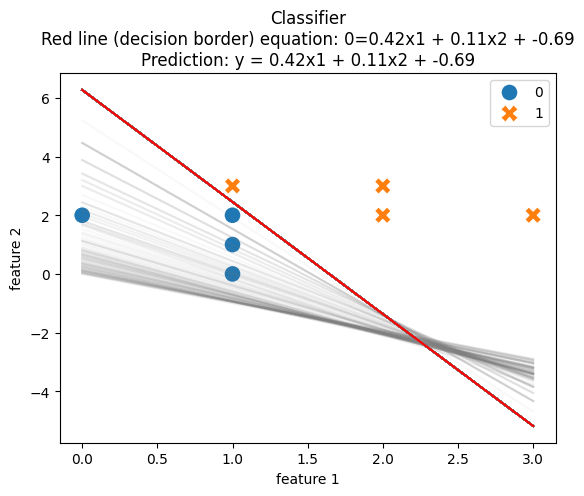

In [ ]:
# Plot
sns.scatterplot( 
	x=df['feature 1'], y=df['feature 2'], 
	style=df['label'], 
	s=150, 
	hue=df['label'], 
	# markers={'feature 1':'s', 'feature 2': 'X'}
)

output = perceptron_algorithm(features, labels, epochs=300)
a = output[0][0]; print(a) # "a" is the weight for x-axis feature
b = output[0][1]; print(b) # "b" is the weight for y-axis feature
c = output[1]; print(c)

datapoints = np.arange(0, 4, 1)
sns.lineplot( x=datapoints, y=(-a*datapoints - c)/b , color='red'  )
# plt.text(rf'$0={a:.2f}x_1 + {b:.2f}x_2 + {c:.2f}$');
plt.title(f'Classifier\nRed line (decision border) equation: 0={a:.2f}x1 + {b:.2f}x2 + {c:.2f}\nPrediction: y = {a:.2f}x1 + {b:.2f}x2 + {c:.2f}')

Text(0.5, 0, 'Iteration')

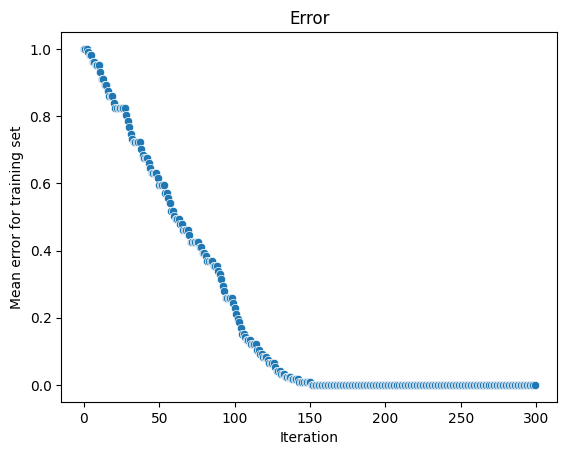

In [ ]:
# Errors
errors = output[-1]
sns.scatterplot( x=np.arange(0, len(errors), 1), y=errors )
plt.title("Error")
plt.ylabel("Mean error for training set")
plt.xlabel("Iteration")

##### 1.1

same but for more features and all of them are binary.

In [ ]:
import numpy as np

features = np.array([ [0,1,1,1],[1,1,0,1],[1,0,1,1],[1,1,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,0],[0,0,0,1] ])
labels = np.array([1,1,1,1,0,0,0,0])

# df = pd.DataFrame({
# 	'feature 1': features[:,0], 
# 	'feature 2': features[:,1],
# 	'label': labels
# })

# df.head()

output = perceptron_algorithm(features, labels, epochs=1000, visualise=False)

In [ ]:
output[0], output[1]

([0.5499999999999996,
  0.4599999999999995,
  0.5899999999999996,
  0.46999999999999953],
 -1.0700000000000007)

Text(0.5, 0, 'Iteration')

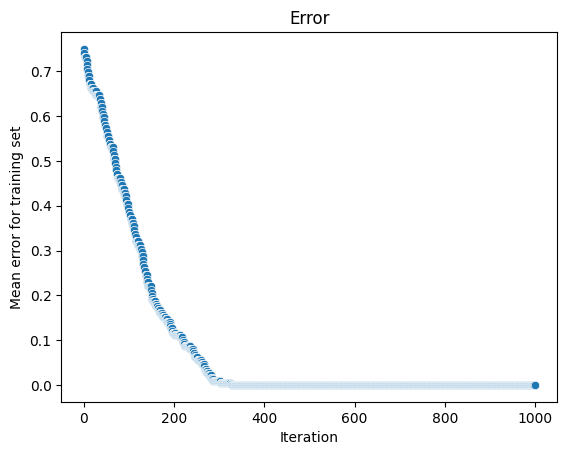

In [ ]:
# Errors
errors = output[-1]
sns.scatterplot( x=np.arange(0, len(errors), 1), y=errors )
plt.title("Error")
plt.ylabel("Mean error for training set")
plt.xlabel("Iteration")

In [ ]:
output[0]

[0.5499999999999996,
 0.4599999999999995,
 0.5899999999999996,
 0.46999999999999953]

In [ ]:
### Predict the labels for the training set
predictions = list()
for i in features:
    prediction = np.dot(output[0], i) + output[1]
    if prediction > 0:
        predictions.append(1)
    else:
        predictions.append(0)
predictions

[1, 1, 1, 1, 0, 0, 0, 0]

# Chapter 6

## Implementation

#### 1 (by hand)

Creating a binary classification model based on logistic regression algorithm for the data with two features. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import random

<Axes: xlabel='feature 1', ylabel='feature 2'>

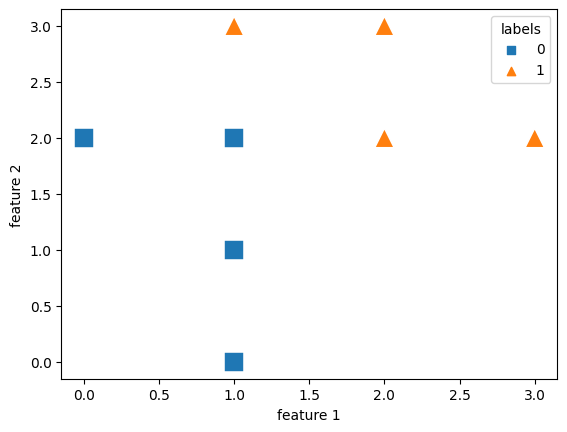

In [ ]:


features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

# Visualise the dots
df = pd.DataFrame({
	'feature 1': features[:,0],
	'feature 2': features[:,1],
	'labels': labels
})
df

sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )


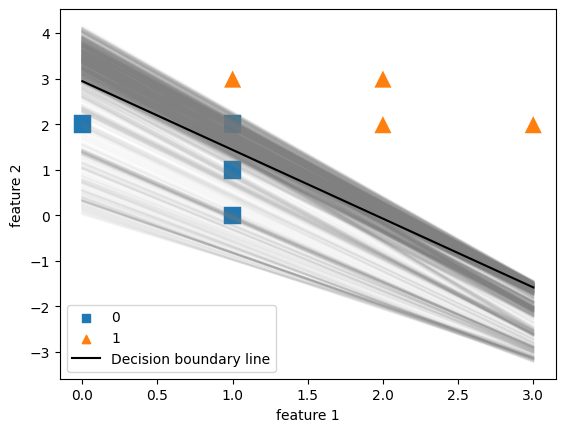

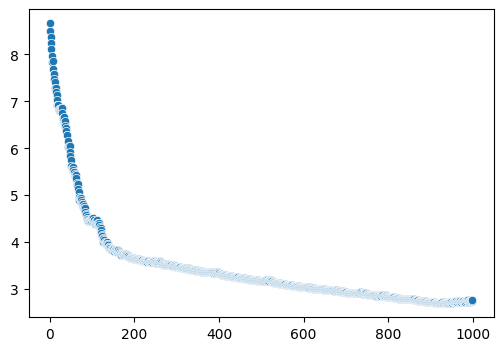

In [ ]:
import utils, random

def sigmoid(x):
	"""
	the Sigmoid activation function
	"""
	### Variant 1
	# return 1 / (1 + np.exp(-x))
	### Variant 2
	return np.exp(x) / (1 + np.exp(x))

def score(weights, bias, features):
	"""
	dot product is like product between 
	vectors (x1,x2,...,xn) and (w1,w2,...,wn) = w1x1 + w2x2 + ... + wnxn
	"""
	return np.dot(weights, features) + bias

def prediction(weights, bias, features):
	"""
	predictions are sigmoid activation function
	applied to the score
	"""
	return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
	"""
	loss function
	"""
	pred = prediction(weights, bias, features)
	return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
	"""
	sum log loss for the entire dataset
	"""
	total_error = 0
	for i in range(len(features)):
		total_error += log_loss(weights, bias, features[i], labels[i])
	return total_error

def logistic_trick(weights, bias, features, label, learning_rate=0.01):
	pred = prediction(weights, bias, features)
	for i in range(len(weights)):
		weights[i] += (label-pred)*features[i]*learning_rate
		bias += (label-pred)*learning_rate
	return weights, bias

def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):
	sns.scatterplot( data=df, x='feature 1', y='feature 2', style='labels', s=200, hue='labels', markers={0:"s", 1:"^"} )
	weights = [1.0 for i in range(len(features[0]))]
	bias = 0.0
	errors = []
	for i in range(epochs):
		errors.append(total_log_loss(weights, bias, features, labels))
		j = random.randint(0, len(features)-1)
		weights, bias = logistic_trick(weights, bias, features[j], labels[j])
		# Plot
		x = np.arange(0, 4, 1)
		sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='grey', alpha=0.05 )
	sns.lineplot( x=x, y=(-weights[0] * x - bias)/weights[1], color='black', label='Decision boundary line' )
	plt.figure(figsize=(6,4))
	# print(errors)
	sns.scatterplot( x=[i for i in range(epochs)], y=errors )
	return weights, bias

weights, bias = logistic_regression_algorithm(features, labels, epochs=1000)



In [ ]:
print(weights, bias)
print('-'*30)

def predict(weights, bias, X):
	x = np.dot( X, weights ) + bias
	y_hat = np.exp(x) / (1 + np.exp(x))
	print(y_hat)

predict(weights, bias, [[1,0], [1,3], [3,2]])

[1.151104331534504, 0.763143125513238] -2.246842447936073
------------------------------
[0.25053929 0.76740059 0.9389321 ]


# Chapter 7

## p. 187

"The $F_{\beta}$-score uses a parameter called $\beta$ (the Greek letter *beta*), which **can take any positive value**.."

More correct would be to say that it can take **any non-negative value** from zero to infinity. 

# Chapter 8

## p. 209

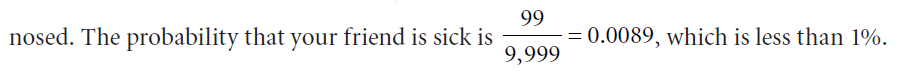

Here, they calculated incorrectly - they forgot to put the 99 sick/diagnosed sick people in the denominator as well. Additionally, this is confirmed by the answer of probability given on p. 208: 0.98%. 

The correct calculation of "the probability that your friend is sick given that he is tested positive", based on the table with a sample, is $p(d+|t+) = \frac{99}{99+9,999} = 0.0098$

> However, if they wanted to give a probability of the friend to purely be sick, regardless of the test result, the correct calculation should be $p(d+) = \frac{99+1}{9,999+989,901} = \frac{1}{9,999} = 1 * 10^{-4}$. 

The correct calculation can be seen below the figure 8.2 on p. 210. 


## p. 229

It says "multiplies all the previous probabilities times the prior probability of the email being spam, and calls this prod_spams". The line for spam is this: `prod_spams = np.long(np.prod(spams)*num_spam)`. However, this multiplies the product of conditional probabilities with the count of spam, not the probability of spam. Also Therefore, the correct line should say: `prod_spams = `

## by hand 1 - spam/ham BoW classification

$$ P(\text{spam}|X_{1},X_{2},...X_{p}) =  \cfrac{ P(\text{spam}) \times \prod_{n=1}^{p}P(X_{n} | \text{spam}) }{ P(\text{spam}) \times \prod_{n=1}^{p}P(X_{n} | \text{spam}) + P(\text{ham}) \times \prod_{n=1}^{p}P(X_{n} | \text{ham}) }$$

This is the code from Luis Serrano that I rewrote to be understood easier. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# emails = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_8_Naive_Bayes/emails.csv')
emails = pd.read_csv('example_datasets/emails.csv')
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
emails['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [ ]:
def process_email(text):
	text = text.lower()
	return list(set(text.split()))

emails['words'] = emails['text'].apply(process_email)
emails.head()

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"[isoverwhelminq, more, ., but, aim, gaps, shou..."
1,Subject: the stock trading gunslinger fanny i...,1,"[tanzania, no, try, but, is, huzzah, albeit, y..."
2,Subject: unbelievable new homes made easy im ...,1,"[no, ., our, being, your, at, take, opportunit..."
3,Subject: 4 color printing special request add...,1,"[626, com, our, ., message, /, request, inform..."
4,"Subject: do not have money , get software cds ...",1,"[marriage, ain, ., best, me, d, is, old, ,, en..."


In [ ]:
n_spam = len(emails[emails['spam'] == 1])
n_ham = len(emails[emails['spam'] == 0])
print(n_spam, n_ham)


1368 4360


In [ ]:
# Finding the priors
prior = sum(emails['spam']) / len(emails)
print(f"Priors: probability that an email is spam: {prior:.4f}") # p(spam)

# Finding the posterios with Bayes' theorem

## Create a dictionary called 'model', which records each word together with the number of appearances of the word in spam emails and in ham emails
model = {}
for index, email in emails.iterrows():
	for word in email['words']:
		if word not in model:
			model[word] = {'spam':1, 'ham':1} # Here we initialise the counts at 1, in order to prevent division by zero in the future
		if word in model:
			if email['spam']:
				model[word]['spam'] += 1
			else:
				model[word]['ham'] += 1

### Create a dictionary but recalculate for probabilities instead of counts
for i, j in model.items():
	p_spam = j['spam'] / n_spam
	p_ham = j['ham'] / n_ham
	model[i] = {'spam': p_spam, 'ham': p_ham}

### slice the first 5 items of the dictionary
print({ i:model[i] for i in list(model.keys())[:5] }) 

print('lottery: ', model['lottery'])
print('sale: ', model['sale'])


Priors: probability that an email is spam: 0.2388
{'isoverwhelminq': {'spam': 0.005847953216374269, 'ham': 0.00022935779816513763}, 'more': {'spam': 0.2916666666666667, 'ham': 0.2025229357798165}, '.': {'spam': 0.9773391812865497, 'ham': 0.9915137614678899}, 'but': {'spam': 0.1834795321637427, 'ham': 0.23302752293577983}, 'aim': {'spam': 0.019736842105263157, 'ham': 0.0038990825688073397}}
lottery:  {'spam': 0.006578947368421052, 'ham': 0.00022935779816513763}
sale:  {'spam': 0.02850877192982456, 'ham': 0.00963302752293578}


In [ ]:
"""
Implementing the naive Bayes algorithm
"""

def predict_naive_bayes(
        email:str
    ) -> float:
    ### Calculate the total number of emails and the prior probabilities
    total = len(emails)
    p_spam = sum(emails['spam']) / total
    p_ham = 1 - p_spam
    ### Process each email by turning it into a list of its words in lowercase
    email = email.lower()
    words = set(email.split())
    #
    spams = [1]
    hams = [1]
    for word in words:
        ### For each word, compute the conditional probability that an email containing that word is spam (or ham), based on the training data
        if word in model:
            spams.append( model[word]['spam'] )
            hams.append( model[word]['ham'] )
    ### Multiplies all the previous probabilities times the prior probability of the email being spam; does the same for ham also
    prod_spams = np.prod(spams) * p_spam
    prod_hams = np.prod(hams) * p_ham
    return prod_spams/(prod_spams+prod_hams)

for i in [
	'Hi mom how are you?',
	'meet me at the lobby of the hotel at nine am',
	'buy cheap lottery easy money now',
	'We have a business meeting at 9am in the meeting room',
	'asdfgh'
]:
	print( predict_naive_bayes(i) )

0.13743544730965782
6.964603508395963e-05
0.999973472265966
0.0006807487677137641
0.2388268156424581


## p. 429 - mistake in answer

for b), it is calculated that $P(A \cap B) = \cfrac{2}{4} = \cfrac{1}{2}$, however, it's actually a quarter, and the calculation should have been $P(A \cap B) = \cfrac{2}{8} = \cfrac{1}{4}$

## p. 430 - mistake in answer

for d). The $P(A \cap B) = \cfrac{3}{36} = \cfrac{1}{12}$

# Chapter 9

## p. 237

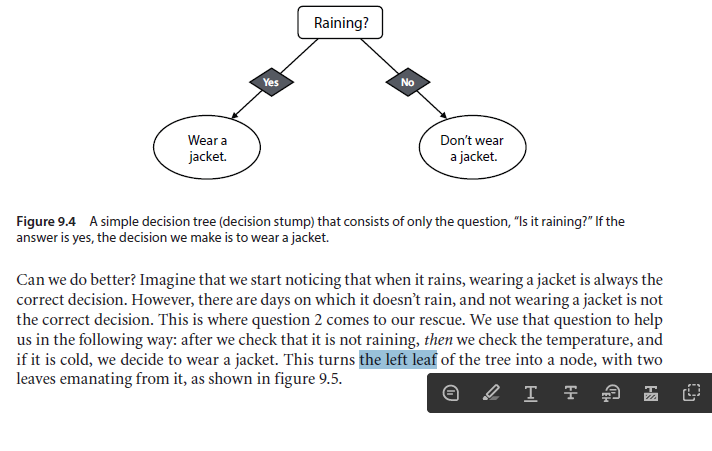

Error at the penultimate line: "This turns **the left** leaf of the tree into a node" - substitute "left" for "right".

## p. 260

On page 260, the third subsection is titled "Accuracy calculation", however, it should have been labelled "Entropy calculation"

## Scikit-learn - decision tree - classification


In [5]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [7]:
"""
- GRE score: a number out of 340
- TOEFL score: a number out of 120
- University rating: a number from 1 to 5
- Statement of Purpose (SOP) strength: a number from 1 to 5
- Undergraduate grade point average (CGPA): a number from 1 to 10
- Letter of Recommendation (LOR): a number from 1 to 5
- Research Experience: Boolean variable (0 to 1)
"""
# data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/refs/heads/master/Chapter_09_Decision_Trees/Admission_Predict.csv')
data = pd.read_csv('example_datasets/Admission_Predict.csv')
data = data.drop(['Serial No.'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
"""
in order to have binary labels, we'll consider 
every student with a chance of 0.75 or higher as "admitted", and 
any other student as "not admitted"
"""
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,True
1,324,107,4,4.0,4.5,8.87,1,True
2,316,104,3,3.0,3.5,8.00,1,False
3,322,110,3,3.5,2.5,8.67,1,True
4,314,103,2,2.0,3.0,8.21,0,False


In [9]:
### Train, val, test sets split
data_train, data_val_test = train_test_split(
    data,
    test_size=0.3,
    random_state=42
)
data_val, data_test = train_test_split(
    data_val_test,
    test_size=0.5,
    random_state=42
)

### Split the data into features (X) and labels (y)
def split_x_y(df):
    X = df.drop(['Admitted'], axis=1)
    y = df['Admitted']
    return X, y

X_train, y_train = split_x_y(data_train)
X_val, y_val     = split_x_y(data_val)
X_test, y_test   = split_x_y(data_test)

### Training a decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
"""
Check accuracy on train set. It's 100%, so the model is likely overfitting
"""
def accuracy_train_val(model):
    print(f" > Training accuracy: {model.score(X_train, y_train):.3f}")
    print(f" > Validation accuracy: {model.score(X_val, y_val):.3f}")
    return None

accuracy_train_val(dt)

 > Training accuracy: 1.000
 > Validation accuracy: 0.817


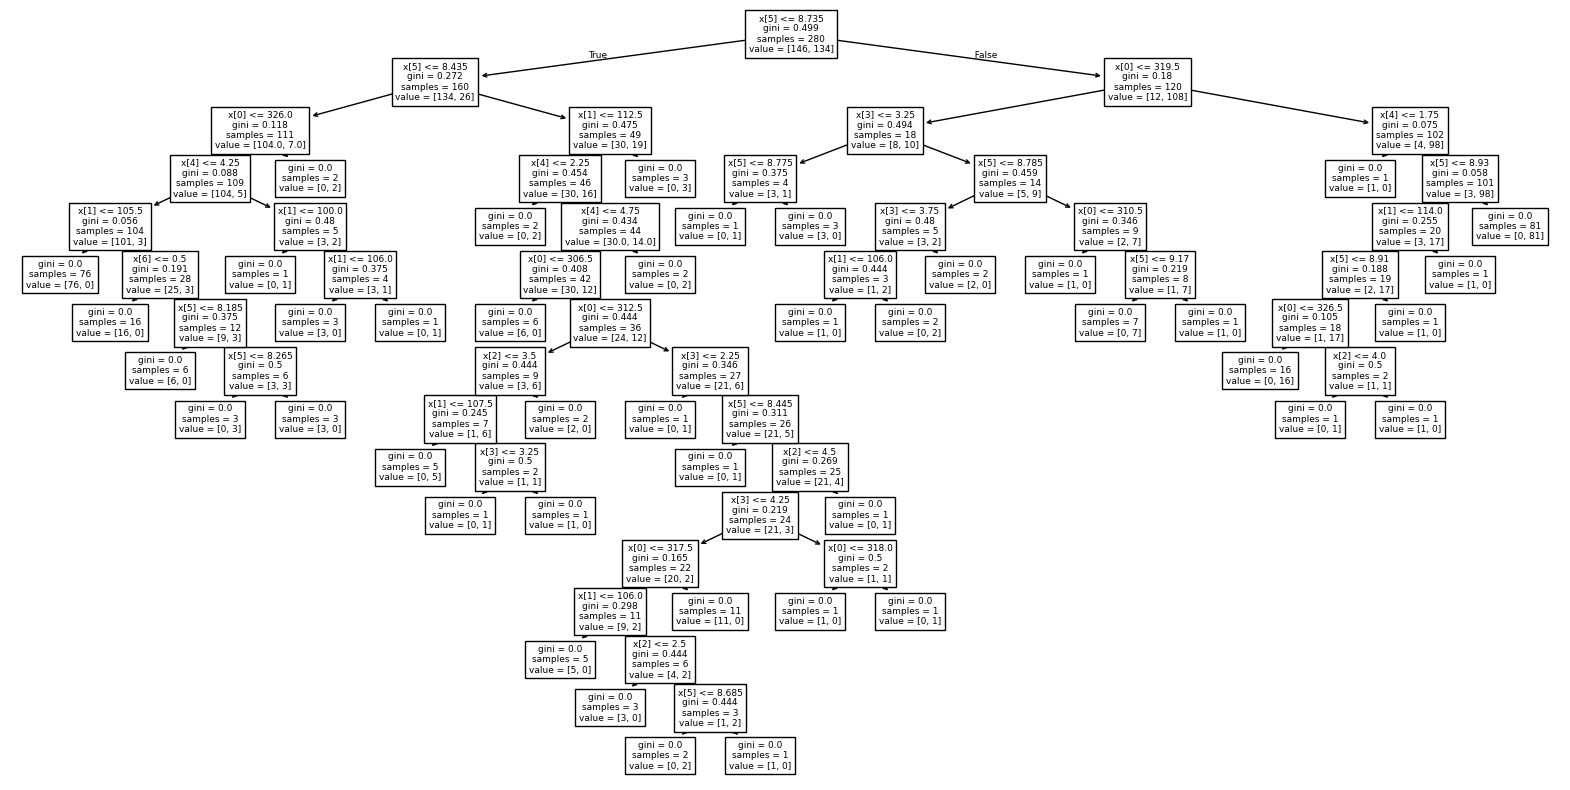

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10));
plot_tree(dt);

 > Training accuracy: 0.871
 > Validation accuracy: 0.883


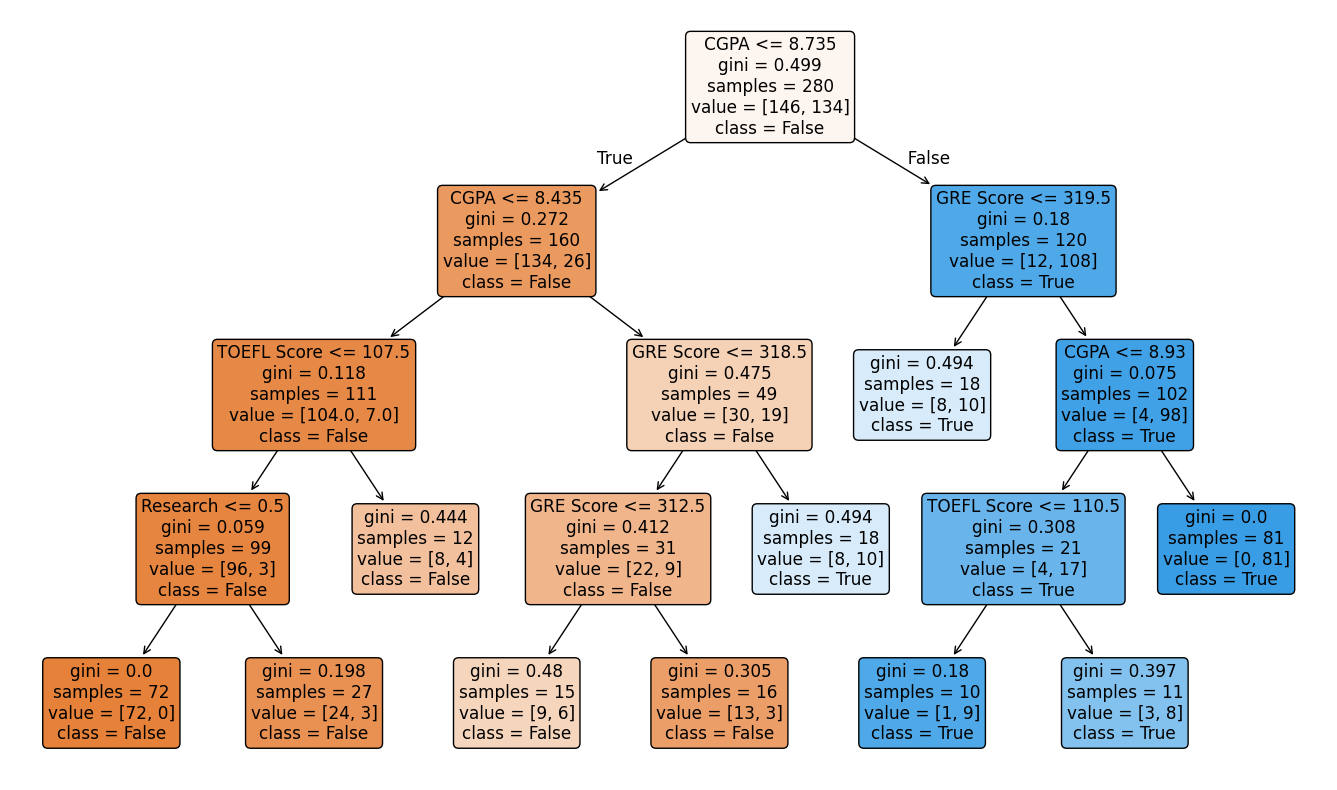

In [11]:
"""
Let's set some hyperparameters in Scikit-Learn to prevent overfitting

Let us check one example
"""

dt_smaller = DecisionTreeClassifier(
    random_state=42,
	max_depth=4, # the maximum allowed depth
	min_samples_leaf=10, # the minimum number of samples required for a leaf node
	min_samples_split=10, # the minimum number of samples required to split a node
	min_impurity_decrease=0.001, # the decrease in impurity must be higher than this threshold to split a node
	# parameter `max_features` - the maximum number of features considered at each split; useful for when there are too many features, and the training process takes too long
)
dt_smaller.fit(X_train, y_train)

plt.figure(figsize=(17,10))
plot_tree(
    dt_smaller,
    feature_names=list(X_train.columns),
    class_names=[str(i) for i in dt_smaller.classes_],
    filled=True,
    rounded=True
);

accuracy_train_val(dt_smaller)

Our tree should look like this:

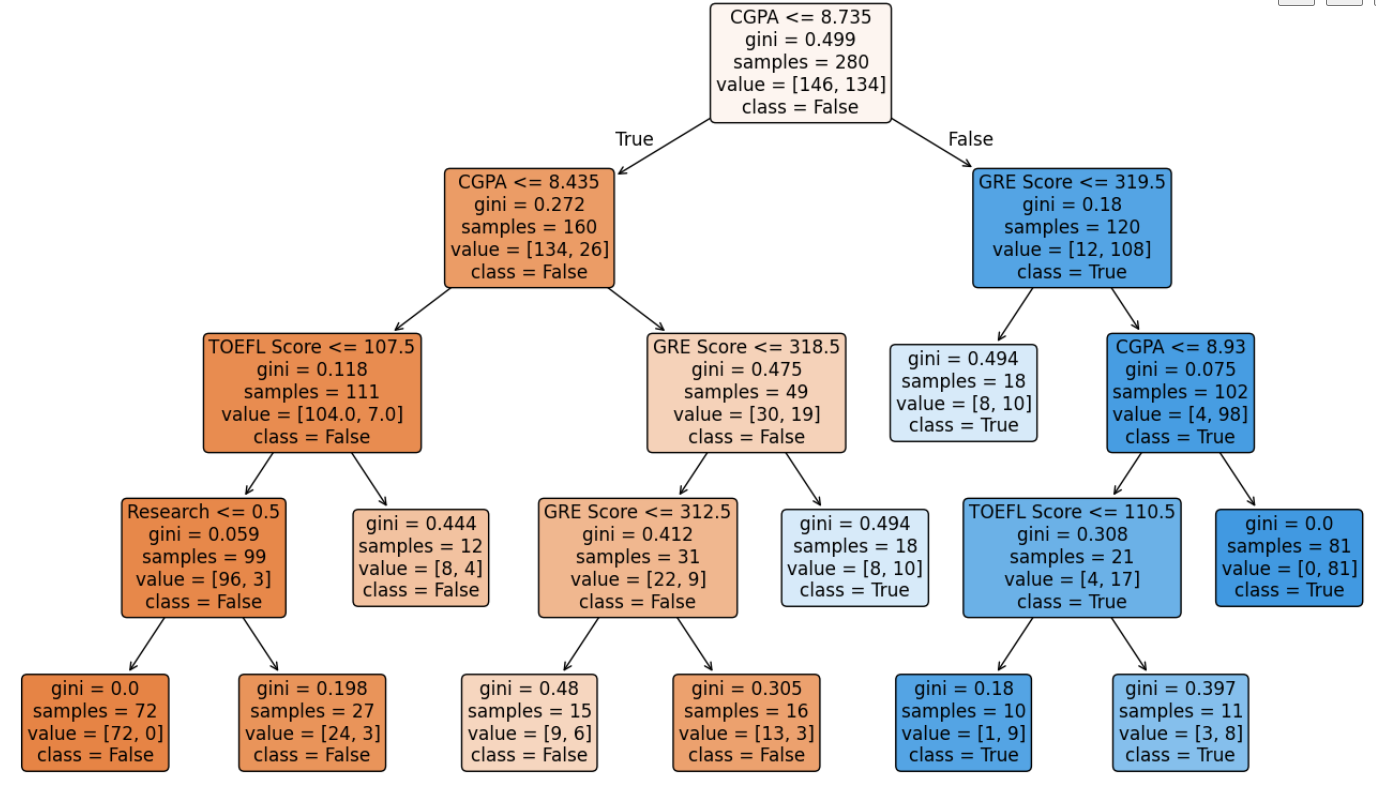

We go from the top to decide:
- first of all, if your CGPA <= 8.435, you are not admitted even with the highest other grades
- if your CGPA is x and 8.435 < x <= 8.735, then the decision depends on your GRE (threshold is 318.5)
- on the other hand, if your CGPA > 8.735, then you are admitted even with the lowest other grades
- 

In [12]:

def predict(GRE,
            TOEFL,
            UniversityRating,
            SOP,
            LOR,
            CGPA,
            Research,
            model=dt_smaller
):
    """
    - GRE score: a number out of 340
    - TOEFL score: a number out of 120
    - University rating: a number from 1 to 5
    - Statement of Purpose (SOP) strength: a number from 1 to 5
    - Undergraduate grade point average (CGPA): a number from 1 to 10
    - Letter of Recommendation (LOR): a number from 1 to 5
    - Research Experience: Boolean variable (0 to 1)
    """
    print(model.predict([[GRE, TOEFL, UniversityRating, SOP, LOR, CGPA, Research]]))
    return None

### False
predict(
    CGPA=8.4, GRE=310,
    TOEFL=120, UniversityRating=5, SOP=5, LOR=5, Research=1
)
### False
predict(
    CGPA=8.5, GRE=310,
    TOEFL=120, UniversityRating=5, SOP=5, LOR=5, Research=1
)
### True
predict(
    CGPA=8.5, GRE=320,
    TOEFL=0, UniversityRating=0, SOP=0, LOR=0, Research=0
)
### True
predict(
    CGPA=8.8, GRE=0,
    TOEFL=0, UniversityRating=0, SOP=0, LOR=0, Research=0
)


[False]
[False]
[ True]
[ True]


C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

## Scikit-learn - decision tree - regression

In [13]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import utils
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'utils'

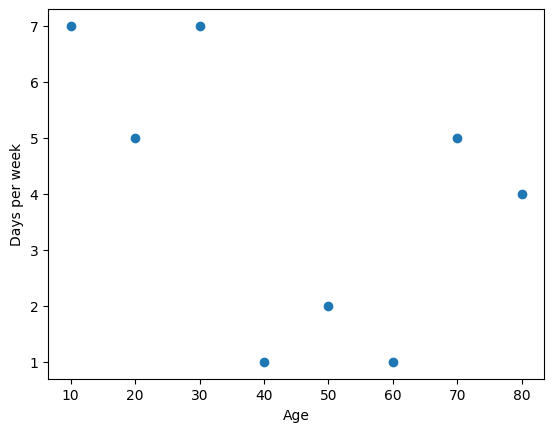

In [14]:
"""
Predict the level of engagement of the users in terms of how manyh days per week they used it. Based on feature - age.

From this dataset, we have roughly three clusters. Thus, a prediction
like this one would make sense:
- If the user is 34 years old or younger, the engagement is 6 days per week. 
- If the user is between 35 and 64, the engagement is 1 day per week.
- If the user is 65 or older, the engagement is 3.5 days per week. 
"""
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,7,1,2,1,5,4]
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [15]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

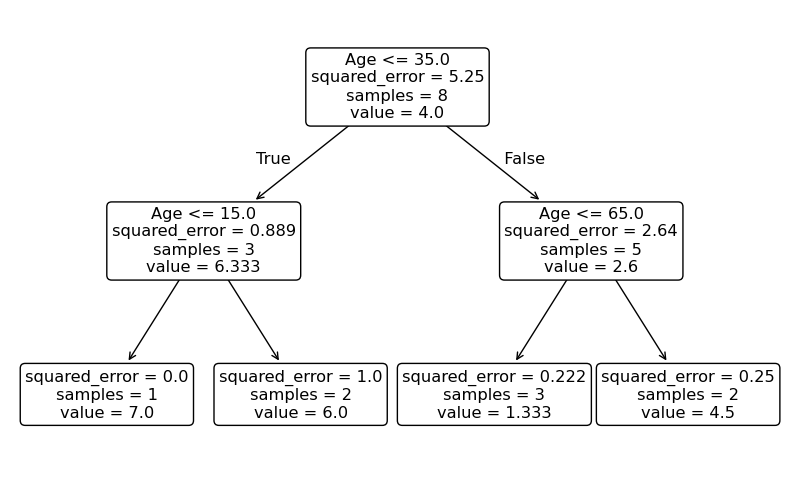

In [16]:
plt.figure(figsize=(10,6))
plot_tree(
    dt_regressor,
    feature_names=['Age'],
    class_names=['Engagement level (days per week)'],
    # filled=True,
    rounded=True
);

In [17]:
dt_regressor.predict([[14], [16], [50], [70]])

array([7.        , 6.        , 1.33333333, 4.5       ])

# Chapter 10

## p. 313, ex. 10.2

Here's my solution. It's the same as the one given in the book, but I came up with it myself following a different approach. 

You have this logic you have to mimic: green dots are label 1, and red dots are label 0. 

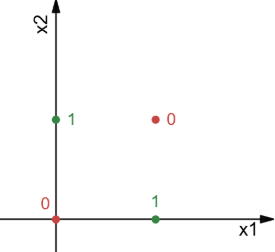

Below is my logic:
- You can build a solution using a combination of step perceptrons
- The solution will be the combination of the following (AND):
  - the dot has to be above the green line
  - AND also below the purple line
  - the output is 1 if both are right

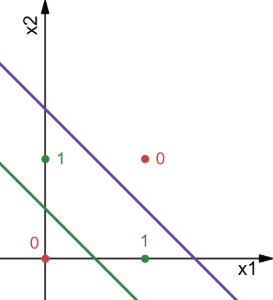

so we can build a 2-level neural network which is a combination of step-activated perceptrons:

**green line**

General form: $y = mx+b$, where $y = x_2$ and $x=x_1$

$m = \cfrac{0.5-0}{0-0.5} = -1$

$f(0.5, 0) \rightarrow b = 0.5$

$y = -1x + 0.5 \leftrightarrow \hat{y_1} = x_1 + x_2 - 0.5$

So the final equation for predictor of "above the green line":

$$\hat{y_1} = x_1 + x_2 - 0.5$$

**purple line**

$m = \cfrac{1-0.5}{0.5-1} = -1$

$f(0.5, 1) \rightarrow b = 1.5$

$y = -x + 1.5 \leftrightarrow \hat{y_2} = x_1 + x_2 - 1.5$

For the purple line classifier, we have to classify as 1 everything that is BELOW it, not above, so we simply reverse the prediction. Therefore, the final equation of predictor of "below the purple line":

$$\hat{y_2} = -x_1 - x_2 + 1.5$$

**Final predictor (combination)**

My equation for the neural network is basically the same as the one given in the answers in the book, so i will simply copy-paste it below. The only difference is that my NN for the 2nd hidden layer has a bias value of -0.5, not -1.5. 

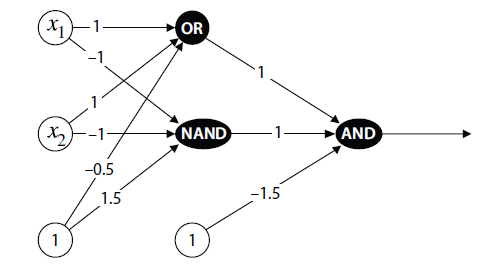



## p. 313, ex. 10.3

In exercise 10.3, the solution for `a. Verify that this is the case.` is given for step functions. However, the figure 10.13 shows the activation functions for the intermediate functions (C and F) as step functions, not logistic functions. 

Additionally, some of the calculations are incorrect:
- $\hat{y} = \sigma (0.731 + 0.731 - 1.5) = \sigma (-0.038) = 0.49$ (albeit the classification is still 0)